In [1]:
#ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn import linear_model
# from skimage.color import rgb2gray
# from cv2 import dnn_superres
from scipy.optimize import curve_fit
import math
import os
%matplotlib inline

from Function.Image_show_func import dataToImg
from Function.Change_format import z_xyzDataFrame,z_xyzData
from Function.Image_processing_func import cut_data,cutTemplateData,matchCutData,create_maskData,maskData
from Function.Matching_data import matchingData
from Function.File_save_func import write_list_2d,check_and_write_file,create_folder_if_not_exists
from Function.Process_lazar_data_func import process_data
from Function.CorrectDistortion import getDistortion,correctDistortion

c:\Users\sugiy\NITech\前川　覚 - 生産機器研究室（各研究グループ）\4_切削班専用フォルダ\杉山\研究室\画像処理プログラム\Function\Process_lazar_data_func.py:24: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,

957
975


c:\Users\sugiy\NITech\前川　覚 - 生産機器研究室（各研究グループ）\4_切削班専用フォルダ\杉山\研究室\画像処理プログラム\Function\Process_lazar_data_func.py:24: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,

957
975


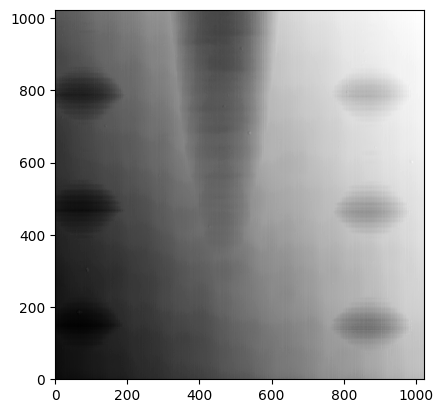

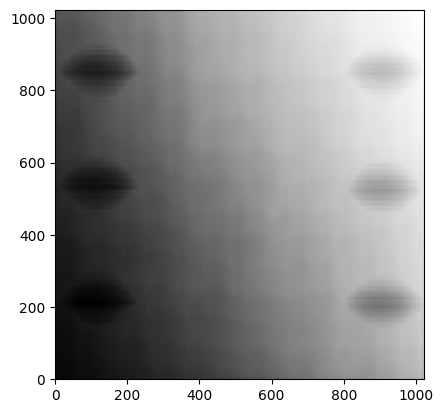

In [2]:
experimentaCondition = {'day':'240830',
                        'テーマ':'角度(0.3)_速度(100,1000,3000)_油(PAO,VG40,VG400)_R(800)',
                        'name':'F100_VG40_2',
                        '材料':'NiP',
                        '工具':'old',
                        'R':800,
                        'oil':True,
                        'F':100,
                        '倍率':50,
                        'data_span':0.250,
                        'theta':0.3,
                        }
folder_name = "csv_生データ/"
child_folder = '240830_油変更/'
zData = process_data(filename = folder_name+child_folder+'切削後8_7.csv',rotation = True,lazar=True,col_range=2000)
zData_rot = process_data(filename = folder_name+child_folder+'前処理8_7.csv',rotation = True,lazar=True,col_range=2000)

In [3]:
# num_increace = 1
# zData_match2,_ = increase_data_plot(zData,exCond = experimentaCondition,num=num_increace)
# zData_rot_match2,data_span_new = increase_data_plot(zData_rot,exCond = experimentaCondition,num=num_increace)
# plt.imshow(dataToImg(zData_match2), cmap = "gray", origin='lower')
# fig = plt.figure()
# plt.imshow(dataToImg(zData_rot_match2), cmap = "gray", origin='lower')

### 画像一致

-0.01
0.9955245852470398
max_val 0.9955245852470398


([123, 71], -0.01)

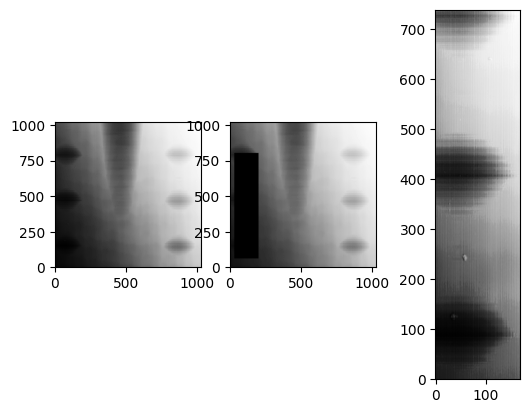

In [4]:
# テンプレートデータ作成
cutPoint_template=[60,800,30,200]
templateData,zData_top_left = cutTemplateData(zData,cutPoint_template)

rotateDeg = 0.01
changeDeg = 1
zData_rot_match2,top_left_rot,changeDeg = matchingData(zData,zData_rot,templateData,rotateDeg,changeDeg)
top_left_rot,changeDeg

vec1 [-63, -41]
vec2 [63, 41]


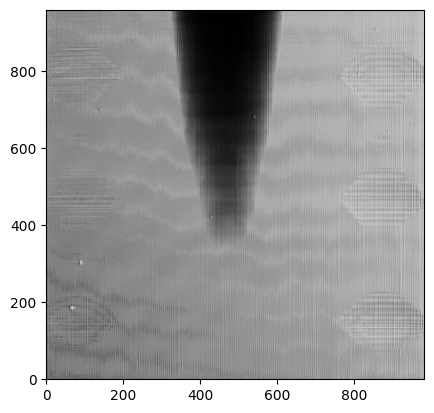

In [5]:
matchData,matchData_rot = matchCutData(zData,zData_rot_match2,zData_top_left,top_left_rot)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.imshow(dataToImg(matchData-matchData_rot), cmap = "gray", origin='lower')

In [6]:
div = matchData-matchData_rot
print(np.std(div[200:400,200:400]))

0.016121645


### 傾き補正

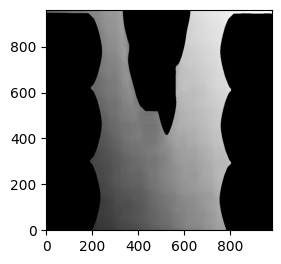

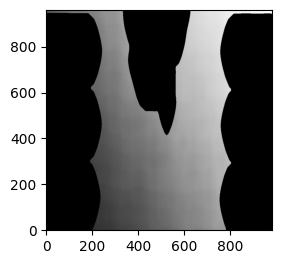

In [7]:
conv_smooth_size, conv2_height, conv2_width, conv2_roop = 10,20,5,40
maskdata = create_maskData(matchData,conv_smooth_size, conv2_height, conv2_width, conv2_roop)
data1_masked = maskData(matchData,maskdata)
data2_masked = maskData(matchData_rot,maskdata)

# mask_range = [[300,-1,300,700],[0,-1,0,250],[0,-1,750,-1]]

# data1_masked = maskData(data1,mask_range)
# data2_masked = maskData(data2,mask_range)

In [8]:
df_xyz = z_xyzDataFrame(data1_masked,experimentaCondition['data_span'])
res1 = getDistortion(df_xyz)
print(res1)
data_xyz = z_xyzData(matchData,experimentaCondition['data_span'])
redata_z_after,redata_xyz_after = correctDistortion(data_xyz,res1)

0.9906876599170344
[0.0027752499691949986, 0.005743233676720166, 0.342301673474656]


In [9]:
df_xyz = z_xyzDataFrame(data2_masked,experimentaCondition['data_span'])
res2 = getDistortion(df_xyz)
print(res2)
data_xyz = z_xyzData(matchData_rot,experimentaCondition['data_span'])
redata_z_before,redata2_xyz_before = correctDistortion(data_xyz,res2)
# redata_z_before,redata2_xyz_before = matchDistortion(data_xyz,res,res2)

0.995324989718728
[0.0026260647037107876, 0.0053081583366377475, 0.31430983313893224]


In [10]:
def get_planeAngle(vec1,vec2=np.array([0,0,1])):
    vec1 = vec1/np.linalg.norm(vec1)
    vec2 = vec2/np.linalg.norm(vec2)
    theta = np.arccos(np.dot(vec1,vec2))*180/np.pi
    return theta

In [11]:
vec_z = np.array([0,0,1])
vec_res1 = np.array([res1[0],res1[1],res1[2]])
vec_res2 = np.array([res2[0],res2[1],res2[2]])
theta = get_planeAngle(vec_res1,vec_res2)
theta

0.015509302291828682

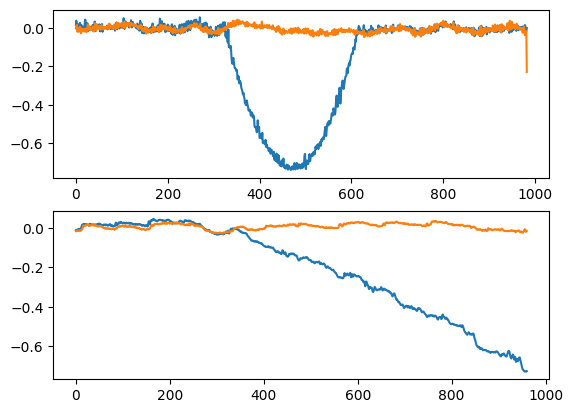

In [12]:
width = redata_z_before.shape[1]
height = redata_z_before.shape[0]
x = range(width)
y = range(height)
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
plt.plot(x, redata_z_after[-10])
plt.plot(x, redata_z_before[-10])
ax = fig.add_subplot(2, 1, 2)
plt.plot(y, redata_z_after[:,int(width/2)])
plt.plot(y, redata_z_before[:,int(width/2)])



In [13]:
div = redata_z_after-redata_z_before
np.std(div[200:300,300:400])

0.015885165

## 分析処理

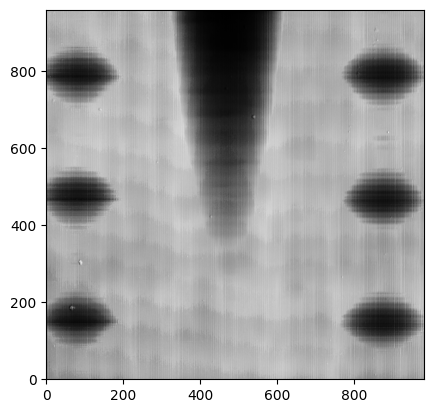

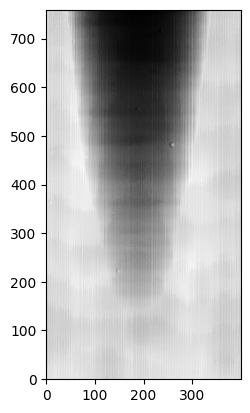

In [14]:
center=480
width=400
start =200
cut_range = [start,-1,center-int(width/2),center+int(width/2)]
# cut_range = [600,1000,300,700]
after,before = cut_data(redata_z_after,redata_z_before,cut_range)

plt.imshow(dataToImg(redata_z_after), aspect=1,cmap = "gray",origin='lower')
fig = plt.figure()
plt.imshow(dataToImg(after), aspect=1,cmap = "gray",origin='lower')

In [15]:
import openpyxl
from pprint import pprint

# 新しいExcelワークブックを作成
wb = openpyxl.Workbook()

# デフォルトのシートを取得
ws = wb.active
ws.title = "Sheet1"
    
for data in experimentaCondition:
    ws.append([data,experimentaCondition[data]])

write_list_2d(ws, after, 100, 1)
write_list_2d(ws, before, 2100, 1)

folder_name = 'csv_画像一致後データ/'+'{}_{}'.format(experimentaCondition['day'],experimentaCondition['テーマ'])

create_folder_if_not_exists(folder_name)

# Excelファイルとして保存
excel_file = '{}/{}.xlsx'.format(folder_name,experimentaCondition['name'])

check_and_write_file(excel_file)


wb.save(excel_file)



KeyboardInterrupt: 